This exercise is adapted from [this](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/) tutorial.

In [1]:
# clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# data processing
import numpy as np

# plotting
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style='dark');

In [2]:
# generate two clusters: a with 100 points, b with 50:
np.random.seed(4711)

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)

print(X.shape)

(150, 2)


In [3]:
X[:2]

array([[ 9.21188389, -0.15188589],
       [ 8.88937431, -0.33937464]])

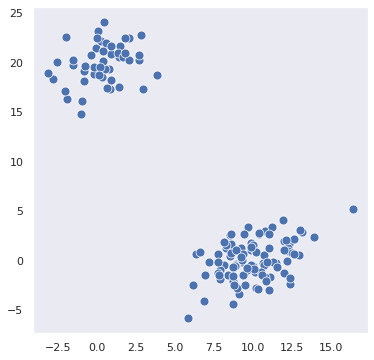

In [4]:
# visualize data
plt.figure(figsize=(6, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], s=80);

In [5]:
# generate the linkage matrix
Z = linkage(X, 'ward')

In [6]:
Z.shape

(149, 4)

In [7]:
# the first merge
Z[0]

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

The format is `[idx1, idx2, dist, sample_count]`. Here, indices 52 and 53 had a distance of 0.04151 between them, and they were merged to create a cluster with a total of 2 samples.

In [8]:
# the first 20 merges
np.set_printoptions(suppress=True)
Z[:20]

array([[ 52.        ,  53.        ,   0.04151055,   2.        ],
       [ 14.        ,  79.        ,   0.05913759,   2.        ],
       [ 33.        ,  68.        ,   0.07106779,   2.        ],
       [ 17.        ,  73.        ,   0.07137121,   2.        ],
       [  1.        ,   8.        ,   0.07543131,   2.        ],
       [ 85.        ,  95.        ,   0.1092779 ,   2.        ],
       [108.        , 131.        ,   0.11007155,   2.        ],
       [  9.        ,  66.        ,   0.11302241,   2.        ],
       [ 15.        ,  69.        ,   0.11428971,   2.        ],
       [ 63.        ,  98.        ,   0.12120077,   2.        ],
       [107.        , 115.        ,   0.12167102,   2.        ],
       [ 65.        ,  74.        ,   0.12490019,   2.        ],
       [ 58.        ,  61.        ,   0.14027736,   2.        ],
       [ 62.        , 152.        ,   0.17259953,   3.        ],
       [ 41.        , 158.        ,   0.17790138,   3.        ],
       [ 10.        ,  83

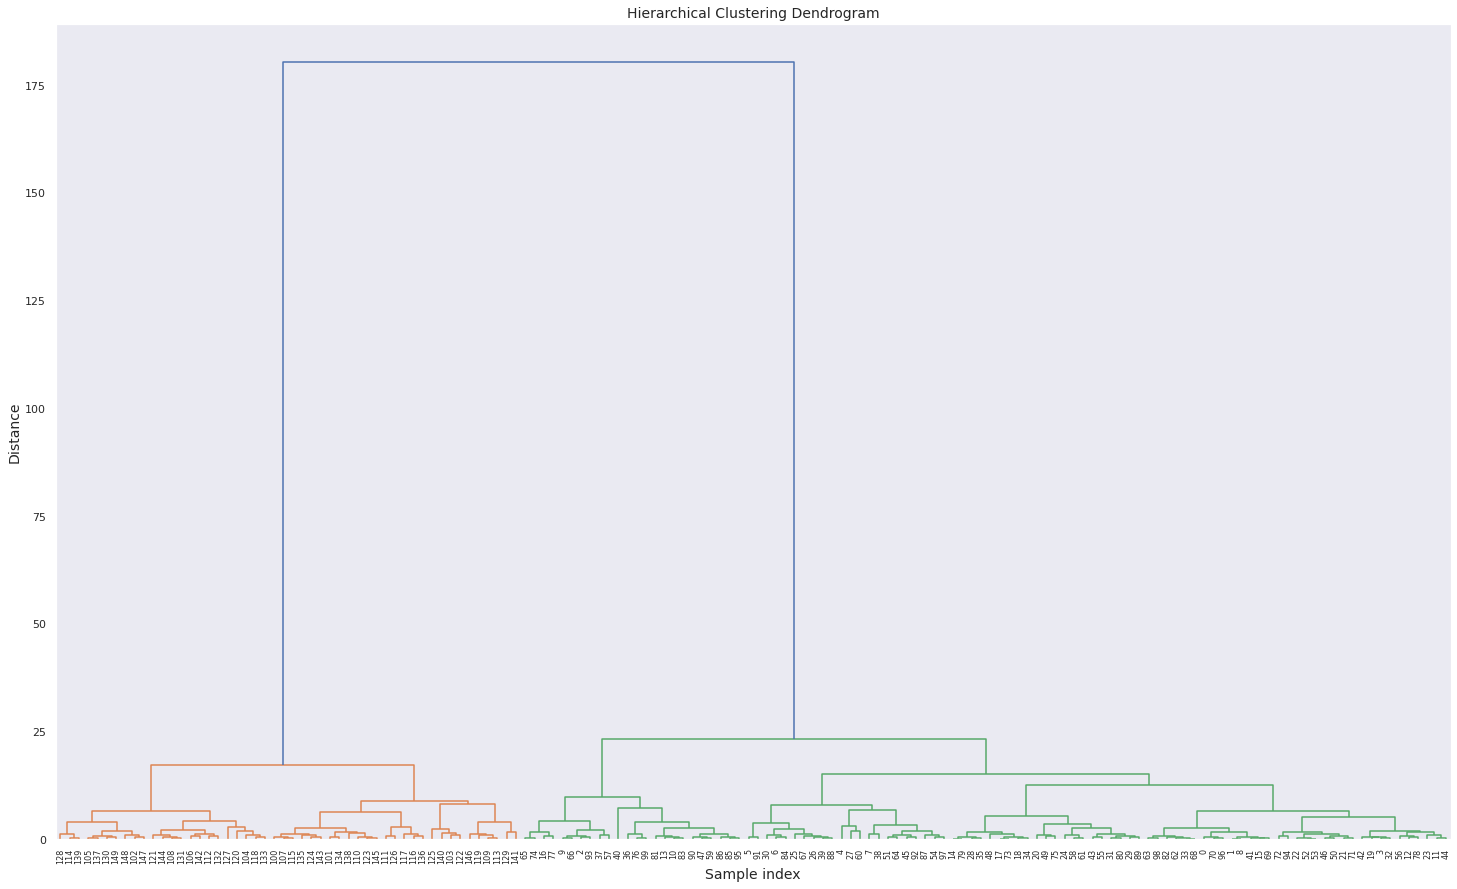

In [9]:
# plot dendrogram
plt.figure(figsize=(25, 15))

dendrogram(Z, leaf_rotation=90, leaf_font_size=8)

plt.title('Hierarchical Clustering Dendrogram', fontsize=14)
plt.xlabel('Sample index', fontsize=14)
plt.ylabel('Distance', fontsize=14);

In [10]:
# the last four merges
Z[-4:]

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

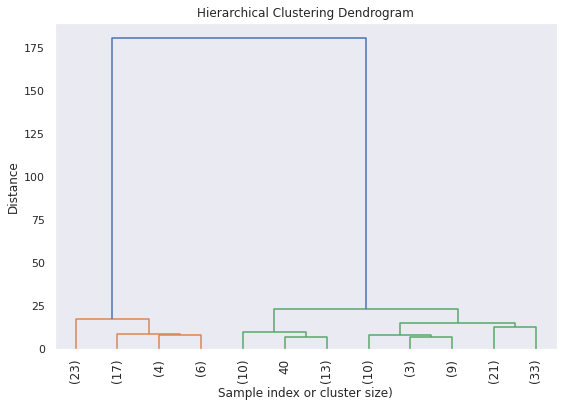

In [11]:
# truncated dendrogram
plt.figure(figsize=(9, 6))

dendrogram(Z, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=12,  # show only the last p merged clusters
           leaf_rotation=90,
           leaf_font_size=12)

plt.title('Hierarchical Clustering Dendrogram', fontsize=12)
plt.xlabel('Sample index or cluster size)', fontsize=12)
plt.ylabel('Distance', fontsize=12);

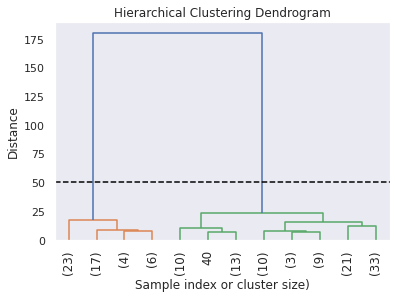

In [12]:
# set cut-off to 50
max_d = 50  # max_d as in max_distance

dendrogram(Z, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=12,  # show only the last p merged clusters
           leaf_rotation=90,
           leaf_font_size=12)

plt.title('Hierarchical Clustering Dendrogram', fontsize=12)
plt.xlabel('Sample index or cluster size)', fontsize=12)
plt.ylabel('Distance', fontsize=12)

plt.axhline(y=max_d, color='black', linestyle='--');

This cut-off value would give us two clusters.

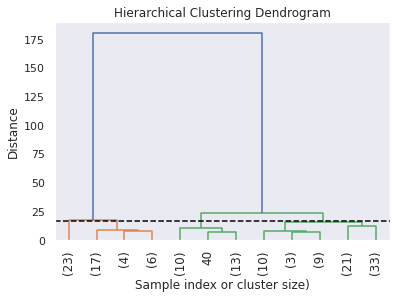

In [13]:
# set cut-off to 16
max_d = 16

dendrogram(Z, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=12,  # show only the last p merged clusters
           leaf_rotation=90,
           leaf_font_size=12)

plt.title('Hierarchical Clustering Dendrogram', fontsize=12)
plt.xlabel('Sample index or cluster size)', fontsize=12)
plt.ylabel('Distance', fontsize=12)

plt.axhline(y=max_d, color='black', linestyle='--');

This cut-off value would give us four clusters.

In [14]:
# retrieve cluster numbers (assignments) based on max_d
max_d = 50
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [15]:
# alternatively, retrieve cluster numbers (assignments) based on k
k = 2
fcluster(Z, k, criterion='maxclust')

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

/home/vishal/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


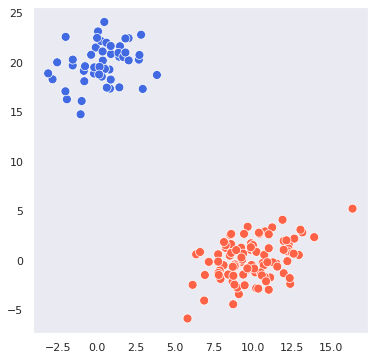

In [16]:
# visualize clusters
plt.figure(figsize=(6, 6))
sns.scatterplot(X[:,0], X[:,1], hue=clusters, s=80, legend=False,
                palette=['royalblue', 'tomato']);